# Lung Cancer CT Scan

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
import os
import cv2

In [5]:
x,y=[],[]
path=r"D:\Singularis DL\dl\Lungs Data\train"
for i in os.listdir(path):
    for j in os.listdir(os.path.join(path,i)):
        image_path=os.path.join(path,i,j)
        array=cv2.imread(image_path)
        array_resize=cv2.resize(array,(110,110))
        array_reshape=array_resize.reshape(110,110,3)
        array_norm=array_reshape/255
        x.append(array_norm)
        y.append(i)
x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)

(613, 110, 110, 3)
(613,)


In [6]:
y

array(['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
       'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
       'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
       'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
       'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
       'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
       'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
       'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
       'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
       'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
       'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
       'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
       'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
       'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
       'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
       'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
       'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
       'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
       'adenocarcinoma_left.lower.lobe_T2_N0_M

In [7]:
le=LabelEncoder()

In [8]:
y=le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [9]:
y.shape

(613,)

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=48)

In [11]:
print(len(xtrain),len(ytrain))
print(len(xtest),len(ytest))

490 490
123 123


In [12]:
# ytest

In [13]:
# xtest

In [14]:
print(xtest.shape)

(123, 110, 110, 3)


In [15]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(110,110,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 108, 108, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,453,188 (9.36 MB)

 Trainable params: 2,453,188 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(xtrain,ytrain,batch_size=32,epochs=13,validation_data=(xtest,ytest))

Epoch 1/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 460ms/step - accuracy: 0.2810 - loss: 1.3891 - val_accuracy: 0.3984 - val_loss: 1.2226
Epoch 2/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 418ms/step - accuracy: 0.5416 - loss: 1.0456 - val_accuracy: 0.6341 - val_loss: 0.8787
Epoch 3/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 382ms/step - accuracy: 0.7698 - loss: 0.6135 - val_accuracy: 0.7480 - val_loss: 0.8464
Epoch 4/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 389ms/step - accuracy: 0.8387 - loss: 0.4528 - val_accuracy: 0.7398 - val_loss: 0.6082
Epoch 5/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 393ms/step - accuracy: 0.8641 - loss: 0.3663 - val_accuracy: 0.8374 - val_loss: 0.5105
Epoch 6/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 377ms/step - accuracy: 0.9394 - loss: 0.2209 - val_accuracy: 0.8618 - val_loss: 0.6008
Epoch 7/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 396ms/step - accuracy: 0.9554 - loss: 0.1299 - val_accuracy: 0.8455 - val_loss: 0.4525
Epoch 8/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 371ms/step - accuracy: 0.9639 - loss: 0.1209 - val_accuracy: 0

In [140]:
test_path=r"D:\Singularis DL\dl\Lungs Data\valid\adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib\000117.png"
array=cv2.imread(test_path)
array_resize=cv2.resize(array,(110,110))
array_reshape=array_resize.reshape(1,110,110,3)
array_norm=array_reshape/255
print(array_norm.shape)

(1, 110, 110, 3)


In [142]:
a=model.predict(array_norm)
a

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[9.9772292e-01, 7.9461309e-04, 8.3303252e-07, 1.4815988e-03]],
      dtype=float32)

In [144]:
a=np.argmax(a)
a

0

In [146]:
l=['Adenocarcinoma', 'Large Cell Carcinoma', 'Normal (non-cancerous scans)', 'Squamous Cell Carcinoma']
l[a]

'Adenocarcinoma'

In [176]:
test_path=r"D:\Singularis DL\dl\Lungs Data\valid\large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa\000114.png"
array=cv2.imread(test_path)
array_resize=cv2.resize(array,(110,110))
array_reshape=array_resize.reshape(1,110,110,3)
array_norm=array_reshape/255
print(array_norm.shape)

(1, 110, 110, 3)


In [178]:
a=model.predict(array_norm)
a

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[2.5315378e-03, 8.2405549e-01, 1.3768655e-05, 1.7339927e-01]],
      dtype=float32)

In [180]:
a=np.argmax(a)
a

1

In [182]:
l=['Adenocarcinoma', 'Large Cell Carcinoma', 'Normal (non-cancerous scans)', 'Squamous Cell Carcinoma']
l[a]

'Large Cell Carcinoma'

In [184]:
test_path=r"D:\Singularis DL\dl\Lungs Data\test\normal\10.png"
array=cv2.imread(test_path)
array_resize=cv2.resize(array,(110,110))
array_reshape=array_resize.reshape(1,110,110,3)
array_norm=array_reshape/255
print(array_norm.shape)

(1, 110, 110, 3)


In [186]:
a=model.predict(array_norm)
a

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[7.5354583e-05, 3.5862269e-10, 9.9991071e-01, 1.3905379e-05]],
      dtype=float32)

In [188]:
a=np.argmax(a)
a

2

In [190]:
l=['Adenocarcinoma', 'Large Cell Carcinoma', 'Normal (non-cancerous scans)', 'Squamous Cell Carcinoma']
l[a]

'Normal (non-cancerous scans)'

In [192]:
test_path=r"D:\Singularis DL\dl\Lungs Data\test\squamous.cell.carcinoma\000146 (6).png"
array=cv2.imread(test_path)
array_resize=cv2.resize(array,(110,110))
array_reshape=array_resize.reshape(1,110,110,3)
array_norm=array_reshape/255
print(array_norm.shape)

(1, 110, 110, 3)


In [194]:
a=model.predict(array_norm)
a

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[1.7217197e-08, 1.3658035e-08, 7.3019414e-06, 9.9999273e-01]],
      dtype=float32)

In [196]:
a=np.argmax(a)
a

3

In [198]:
l=['Adenocarcinoma', 'Large Cell Carcinoma', 'Normal (non-cancerous scans)', 'Squamous Cell Carcinoma']
l[a]

'Squamous Cell Carcinoma'

In [200]:
print(model.input_shape)

(None, 110, 110, 3)


In [202]:
ypred = model.predict(xtest)
ypred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


array([[9.95947182e-01, 2.06020632e-05, 4.55491218e-08, 4.03220113e-03],
       [1.39718852e-03, 2.19032543e-07, 1.63707796e-06, 9.98600900e-01],
       [2.52696988e-03, 9.91804361e-01, 3.04185948e-03, 2.62680463e-03],
       [9.98190820e-01, 1.03188577e-05, 1.28215584e-06, 1.79760624e-03],
       [1.40361302e-03, 8.45058021e-05, 9.62390368e-06, 9.98502254e-01],
       [1.40268365e-02, 9.80390251e-01, 4.12431064e-06, 5.57886576e-03],
       [7.88908892e-06, 1.88406534e-06, 1.30658364e-07, 9.99990106e-01],
       [9.99878645e-01, 6.28057535e-07, 1.27165708e-06, 1.19351578e-04],
       [9.31854069e-04, 9.99067843e-01, 2.14517470e-09, 3.42054420e-07],
       [1.10515032e-03, 9.27993824e-05, 9.98309374e-01, 4.92730935e-04],
       [8.88860345e-01, 2.33755381e-05, 1.76694273e-04, 1.10939562e-01],
       [3.44213930e-07, 3.82097088e-12, 9.99999285e-01, 3.38767137e-07],
       [9.98164952e-01, 6.65063271e-04, 5.00651936e-07, 1.16952707e-03],
       [1.55991653e-03, 1.18191620e-05, 2.14719876e

In [204]:
al=[]
for i in ypred:
#     print(i)
    al.append(np.argmax(i))
print(al)

[0, 3, 1, 0, 3, 1, 3, 0, 1, 2, 0, 2, 0, 3, 2, 0, 2, 3, 1, 3, 3, 3, 0, 3, 3, 0, 2, 2, 0, 1, 3, 0, 3, 3, 0, 0, 0, 3, 2, 2, 0, 0, 0, 2, 0, 2, 3, 3, 2, 3, 3, 2, 3, 3, 0, 3, 3, 3, 0, 0, 1, 2, 1, 1, 0, 2, 3, 0, 0, 0, 3, 0, 3, 0, 2, 3, 3, 0, 3, 3, 2, 3, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 3, 0, 3, 3, 0, 1, 2, 3, 2, 1, 2, 0, 2, 2, 0, 3, 3, 2, 0, 3, 2, 2, 3, 0, 2, 0, 0, 3, 3, 0, 1]


In [206]:
cm=confusion_matrix(ytest,al)
cm

array([[38,  0,  1,  7],
       [ 4, 13,  1,  2],
       [ 0,  0, 24,  0],
       [ 0,  0,  1, 32]], dtype=int64)

<Axes: >

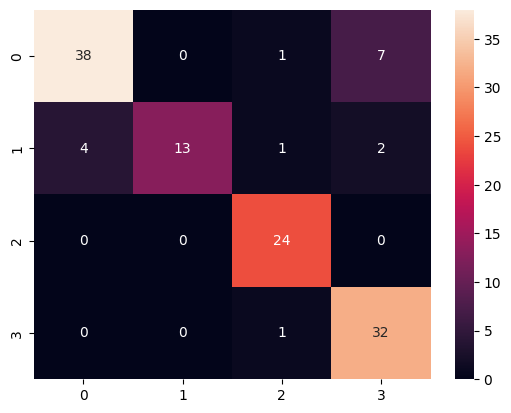

In [208]:
sns.heatmap(cm,annot=True,fmt='d')

In [210]:
#l= model.save("lungs99.h5")